# Этап 1 | Обучающая выборка | Ранжирование

## 1. Построение обучающей выборки
Пусть 
$$
\begin{cases}
    E = \sigma_1 (x + D)\\
    S_x = \sigma_2 (x + D)
\end{cases}
-D < x < 0
$$
$$
\begin{cases}
    G = (x + D_0)^2\\
    S_{\tau} = cos(2\pi\tau) + 1
\end{cases}
0 < \tau < 1
$$
Возьмем в качестве $v_i$
$$
x_{yng} = A_{yng} + B_{yng}cos(2\pi\tau)\ \ \ \ \ \ x_{old} = A_{old} + B_{old}cos(2\pi\tau)
$$

Ключевые макропараметры:

        Для молодых особей:
$$
M_1(v_i) = \int_0^1 E(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_2(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{yngi}(\tau))d\tau\ \ \ \ \ \ M_3(v_i) = -\int_0^1 (x'_{yngi}(\tau))d\tau\ \ \ \ \ \ M_4(v_i) = -\int_0^1 G(x_{yngi}(\tau))d\tau
$$
        Для взрослых особей:
$$
M_5(v_i) = \int_0^1 E(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_6(v_i) = \int_0^1 S_{\tau}(\tau)S_x(x_{oldi}(\tau))d\tau\ \ \ \ \ \ M_7(v_i) = -\int_0^1 (x'_{oldi}(\tau))d\tau\ \ \ \ \ \ M_8(v_i) = -\int_0^1 G(x_{oldi}(\tau))d\tau
$$



Эмпирические данные 

In [64]:
alpha_y = 0.0016
alpha_o = 0.006
betta_y = 0.0000007
betta_o = 0.000000075
gamma_y = 0.00008
gamma_o = 0.004
delta_y = 0.000016
delta_o = 0.00006

D = 120
D0 = 70  
sigma1 = 1
sigma2 = 1
Nmax = 100

Используемые библиотеки

In [65]:
import csv
import random as rn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Генерация параметров для стратегий

Запись параметров обучающей выборки 

In [66]:
def rand_AB(Nmax):
   A_yng = []
   B_yng = []
   A_old = []
   B_old = []
   for i in range(0, Nmax):
      Ay = round(rn.uniform(-D, 0), 4)
      By = round(rn.uniform(-min(Ay + D, -Ay), min(Ay + D, -Ay)), 4)
      A_yng.append(Ay)
      B_yng.append(By)

      Ao = round(rn.uniform(-D, 0), 4)
      Bo = round(rn.uniform(-min(Ao + D, -Ao), min(Ao + D, -Ao)), 4)
      A_old.append(Ao)
      B_old.append(Bo)
   
   data_AB = {'A_yng': A_yng, 'B_yng': B_yng, 'A_old': A_old, 'B_old': B_old}
   dataAB = pd.DataFrame(data = data_AB)
   dataAB.to_csv("data_AB.csv")

Создание стратегий

In [67]:
def strategy(t, Nmax):
   data_AB = pd.read_csv('data_AB.csv')
   Ay = data_AB['A_yng'].tolist()
   By = data_AB['B_yng'].tolist()
   Ao = data_AB['A_old'].tolist()
   Bo = data_AB['B_old'].tolist()
   x_yng = []
   x_old = []
   for i in range(0, Nmax):
      xyng = Ay[i] + By[i]*np.cos(2*np.pi*t)
      x_yng.append(xyng)

      xold = Ao[i] + Bo[i]*np.cos(2*np.pi*t)
      x_old.append(xold)
   return x_yng, x_old

In [68]:
def Macroparametrs():
   data_AB = pd.read_csv('data_AB.csv')
   Ay = data_AB['A_yng'].tolist()
   By = data_AB['B_yng'].tolist()
   Ao = data_AB['A_old'].tolist()
   Bo = data_AB['B_old'].tolist()
   M1 = []
   M2 = []
   M3 = []
   M4 = []
   M5 = []
   M6 = []
   M7 = []
   M8 = []
   for i in range(0, Nmax):
      M1.append(round(sigma1*(Ay[i] + D), 5))
      M2.append(round(-sigma2*(Ay[i] + D + By[i]/2), 5))
      M3.append(round(-2*(np.pi*By[i])**2, 5))
      M4.append(round(-((Ay[i] + D0)**2 + (By[i]**2)/2), 5))
      M5.append(round(sigma1*(Ao[i] + D), 5))
      M6.append(round(-sigma2*(Ao[i] + D + Bo[i]/2), 5))
      M7.append(round(-2*(np.pi*Bo[i])**2, 5))
      M8.append(round(-((Ao[i] + D0)**2 + (Bo[i]**2)/2), 5))

   data_M = {'M1': M1, 'M2': M2, 'M3': M3, 'M4': M4, 'M5': M5, 'M6': M6, 'M7': M7, 'M8': M8}
   dataM = pd.DataFrame(data = data_M)
   dataM.to_csv("data_M.csv")
   """ Macroparametrs_normalize() """

In [69]:
def Macroparametrs_normalize():
   data_M = pd.read_csv('data_M.csv')
   M1 = data_M['M1'].tolist()
   M2 = data_M['M2'].tolist()
   M3 = data_M['M3'].tolist()
   M4 = data_M['M4'].tolist()
   M5 = data_M['M5'].tolist()
   M6 = data_M['M6'].tolist()
   M7 = data_M['M7'].tolist()
   M8 = data_M['M8'].tolist()
   
   abs_M1 = []
   abs_M2 = []
   abs_M3 = []
   abs_M4 = []
   abs_M5 = []
   abs_M6 = []
   abs_M7 = []
   abs_M8 = []

   for i in range(0, Nmax):
      abs_M1.append(abs(M1[i]))
      abs_M2.append(abs(M2[i]))
      abs_M3.append(abs(M3[i]))
      abs_M4.append(abs(M4[i]))
      abs_M5.append(abs(M5[i]))
      abs_M6.append(abs(M6[i]))
      abs_M7.append(abs(M7[i]))
      abs_M8.append(abs(M8[i]))
   M1_n = []
   M2_n = []
   M3_n = []
   M4_n = []
   M5_n = []
   M6_n = []
   M7_n = []
   M8_n = []
   for i in range(0, Nmax):
      M1_n.append(M1[i]/max(abs_M1))
      M2_n.append(M2[i]/max(abs_M2))
      M3_n.append(M3[i]/max(abs_M3)) 
      M4_n.append(M4[i]/max(abs_M4))
      M5_n.append(M5[i]/max(abs_M5))
      M6_n.append(M6[i]/max(abs_M6))
      M7_n.append(M7[i]/max(abs_M7)) 
      M8_n.append(M8[i]/max(abs_M8))

   data_M_n = {'M1': M1_n, 'M2': M2_n, 'M3': M3_n, 'M4': M4_n, 'M5': M5_n, 'M6': M6_n, 'M7': M7_n, 'M8': M8_n}
   dataMnorm = pd.DataFrame(data = data_M_n)
   dataMnorm.to_csv("data_Mnorm.csv")
   
   

In [70]:
def fitness():
   data_M = pd.read_csv('data_M.csv')
   M1 = data_M['M1'].tolist()
   M2 = data_M['M2'].tolist()
   M3 = data_M['M3'].tolist()
   M4 = data_M['M4'].tolist()
   M5 = data_M['M5'].tolist()
   M6 = data_M['M6'].tolist()
   M7 = data_M['M7'].tolist()
   M8 = data_M['M8'].tolist()
   J = []
   r = 0
   s = 0
   p = 0
   q = 0
   for i in range(0, Nmax):
      r = alpha_o*M5[i] + betta_o*M7[i] + delta_o*M8[i]
      s = gamma_o*M6[i]
      p = alpha_y*M1[i] + betta_y*M3[i] + delta_y*M4[i]
      q = gamma_y*M2[i]
      j_ =  -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
      J.append(j_)
   return J

Тут строятся все синусоиды СВМ зоопланктона

Миграции молодых особей


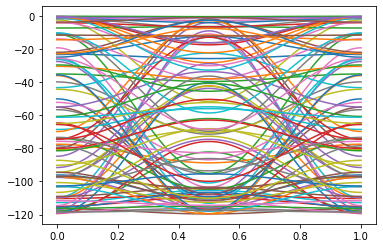

Миграции взрослых особей


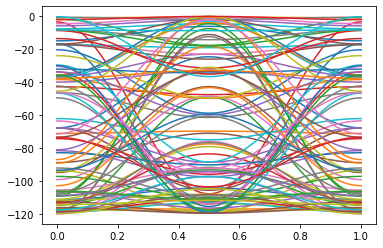

In [71]:
t = np.linspace(0, 1, Nmax)
rand_AB(Nmax)
x = strategy(t, Nmax)
x_yng = x[0]
x_old = x[1]
DVM_yng = []
DVM_old = []
print('Миграции молодых особей')
for i in range (0, Nmax):
   DVM_yng.append(x_yng[i])
   plt.plot(t, DVM_yng[i])
plt.show()
print('Миграции взрослых особей')
for i in range (0, Nmax):
   DVM_old.append(x_old[i])
   plt.plot(t, DVM_old[i])
plt.show()


In [72]:
J = fitness()
print(J)


[nan, 0.12965917567984178, 0.23593447835821474, 0.04985407907900445, nan, 0.9284492823076146, 0.7452861399638419, nan, nan, 0.8232409467066313, 0.6080123021072057, 1.1106142137795938, 0.7168694025677711, 0.633578171687527, 0.40726889939432503, 0.7070649597736322, 0.45868199295325046, 0.31442115521713293, 0.9528115999764547, 0.7321053621249881, 0.5831258181213748, 1.0876997117890017, 0.7083184219340954, 0.16509649348787564, 0.9432517276223236, 0.8086158518520656, 1.0071774373836033, 1.0575666197736449, 0.34917499689963405, 0.32698964516655626, 0.3517630590909361, 0.7605058173773405, 0.8285803860392318, 0.4209943241165298, 0.17554583114354194, 0.8726219137903809, 1.0055308697575094, 0.7996887151661858, 0.7834927875050486, 0.16605693228999074, 0.12219811248089177, 0.8579268182673834, 0.9734591318140673, 0.6392263330428356, 0.9368382417893387, 0.9282734380983256, 0.35729445257116005, 0.5470111463970295, 0.5630698460331311, 0.6838212516788105, 0.7605192712478313, 0.27494823729189016, 0.0616

C:\Users\MANDAR~1\AppData\Local\Temp/ipykernel_12228/4194949013.py:21: RuntimeWarning: invalid value encountered in sqrt
  j_ =  -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)
